<a href="https://colab.research.google.com/github/barish-bit/Neural_Network-based_Climate_Data_Forecasting/blob/main/Using_Keras_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

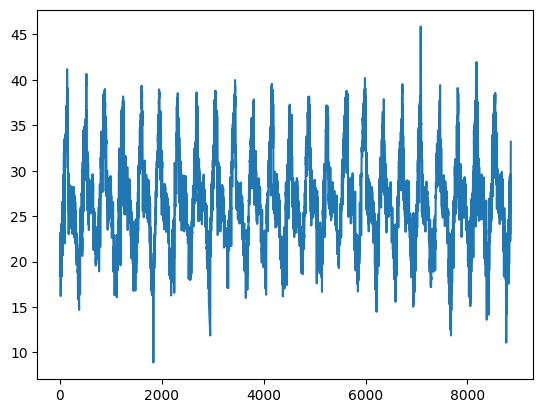

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('/content/final_output2.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [ ]:
# split into train and test sets
#train1,val1, test1 = dataset[:-3003],dataset[-3003:-1003],dataset[-1003:]


7849 1003


In [ ]:
#print(test1)

In [ ]:



'''al=[]
for i in range (len(val1)):
  val.append(val1[i][0])'''



'al=[]\nfor i in range (len(val1)):\n  val.append(val1[i][0])'

In [ ]:
print(len(train))

7849


In [ ]:
print(train)

[18.425, 19.625, 20.6, 20.7625, 20.175, 20.1875, 20.6125, 20.4875, 20.8625, 19.5875, 21.975, 21.9125, 23.2, 21.3, 21.25, 16.2125, 16.5625, 18.9, 18.6625, 19.375, 19.975, 21.875, 23.0375, 24.05, 24.15, 23.8, 23.0125, 22.625, 22.6, 22.0375, 19.4, 19.55, 18.525, 18.35, 19.675, 20.1, 20.75, 23.35, 23.5875, 21.7, 20.754168, 22.833334, 21.3375, 22.2875, 21.4, 23.25, 23.58125, 23.725, 24.325, 23.875, 26.6, 25.175, 21.25, 20.6625, 22.5125, 22.59375, 23.3, 23.4125, 22.7, 24.275, 24.2625, 24.925, 24.4, 27.625, 28.6375, 27.425, 26.35, 26.775, 27.95, 27.05, 27.6375, 29.1375, 29.575, 24.722221, 26.927778, 28.275, 31.75, 28.6625, 30.975, 32.0375, 30.0, 30.375, 31.5, 29.775, 31.4, 32.175, 33.4625, 30.425, 32.025, 32.45, 31.325, 31.375, 31.0125, 30.3875, 31.1625, 31.55, 26.625, 27.275, 22.0, 26.125, 25.175, 27.6625, 29.2, 32.125, 30.6625, 30.3, 31.3375, 31.5375, 32.20625, 33.4125, 33.6, 33.9, 33.825, 32.775, 34.05, 33.6, 33.0, 32.125, 32.425, 34.3, 33.4125, 33.0, 34.875, 34.325, 34.975, 36.2, 36.2125,

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dataframe = pd.read_csv('/content/final_output2.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


train1,test1 = dataset[:-1003],dataset[-1003:]
print(len(train1), len(test1))






import numpy as np

train=[]
for i in range (len(train1)):
  train.append(train1[i][0])

test=[]
for i in range (len(test1)):
  test.append(test1[i][0])


# convert an array of values into a dataset matrix
def create_dataset(dataset):
 dataX, dataY, dataZ, dataW = [], [],[], []
 for i in range(len(dataset)-3):
   a = dataset[i:(i+2)]
   dataX.append(dataset[(i)])
   dataY.append(dataset[(i + 1)])
   dataZ.append(dataset[(i+2)])
   dataW.append(dataset[i+3])

 return np.array(dataX), np.array(dataY), np.array(dataZ), np.array(dataW)


# reshape into X=t and Y=t+1
#look_back = 1
trainX1,trainX2, trainX3, trainY = create_dataset(train)
#valX1, valX2,valX3, valY = create_dataset(test)
testX1, testX2,testX3, testY = create_dataset(test)
trainX2



trainX=[]
for i in range (len(trainX1)):
  trainX.append([trainX1[i],trainX2[i], trainX3[i]])
trainX=pd.DataFrame(trainX)
#print(trainX)

'''valX=[]
for i in range (len(valX1)):
  valX.append([valX1[i],valX2[i],valX3[i]])
testX=pd.DataFrame(valX)'''


testX=[]
for i in range (len(testX1)):
  testX.append([testX1[i],testX2[i],testX3[i]])
testX=pd.DataFrame(testX)
#print(testX)


import math

from keras import models
from keras import layers
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(layers.Dense(32, input_shape=(3,), activation='relu'))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))



#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
history=model.fit(trainX, trainY, epochs=120, batch_size=264, validation_data=(testX,testY))
# Estimate model performance
trainScore = model.evaluate(trainX, trainY)
print(trainScore)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)



# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[2:len(trainPredict)+2, :] = trainPredict


# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(2*2)+1:len(dataset)-1, :] = testPredict


# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

array([19.625 , 20.6   , 20.7625, ..., 28.3   , 28.8625, 28.6375],
      dtype=float32)

In [ ]:
print(len(trainX2))

7846


In [ ]:
print(trainX1[0])

18.425


Epoch 1/120
30/30 [==============================] - 4s 33ms/step - loss: 650.8450 - mse: 650.8450 - val_loss: 225.3923 - val_mse: 225.3923
Epoch 2/120
30/30 [==============================] - 0s 8ms/step - loss: 95.7822 - mse: 95.7822 - val_loss: 5.4104 - val_mse: 5.4104
Epoch 3/120
30/30 [==============================] - 0s 14ms/step - loss: 3.3609 - mse: 3.3609 - val_loss: 3.7054 - val_mse: 3.7054
Epoch 4/120
30/30 [==============================] - 0s 11ms/step - loss: 2.1273 - mse: 2.1273 - val_loss: 3.6235 - val_mse: 3.6235
Epoch 5/120
30/30 [==============================] - 0s 7ms/step - loss: 2.0796 - mse: 2.0796 - val_loss: 3.6199 - val_mse: 3.6199
Epoch 6/120
30/30 [==============================] - 0s 7ms/step - loss: 2.0726 - mse: 2.0726 - val_loss: 3.6166 - val_mse: 3.6166
Epoch 7/120
30/30 [==============================] - 0s 6ms/step - loss: 2.0689 - mse: 2.0689 - val_loss: 3.6145 - val_mse: 3.6145
Epoch 8/120
30/30 [==============================] - 0s 8ms/step - los

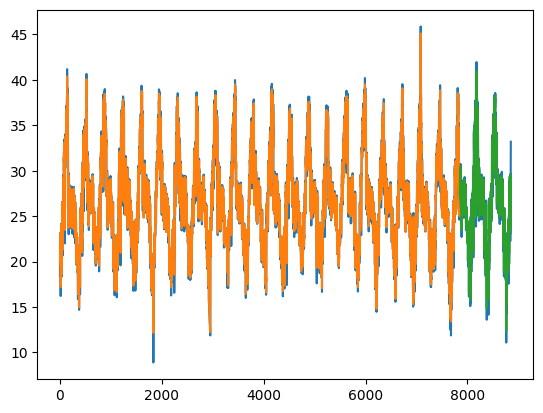

In [ ]:
import math

from keras import models
from keras import layers
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(layers.Dense(32, input_shape=(3,), activation='relu'))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))



#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
history=model.fit(trainX, trainY, epochs=120, batch_size=264, validation_data=(testX,testY))
# Estimate model performance
trainScore = model.evaluate(trainX, trainY)
print(trainScore)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)



# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[2:len(trainPredict)+2, :] = trainPredict


# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(2*2)+1:len(dataset)-1, :] = testPredict


# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

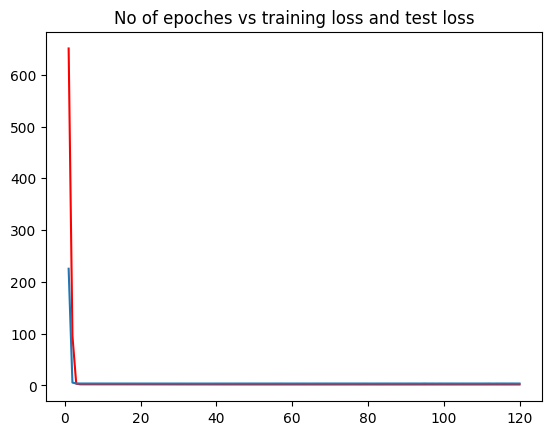

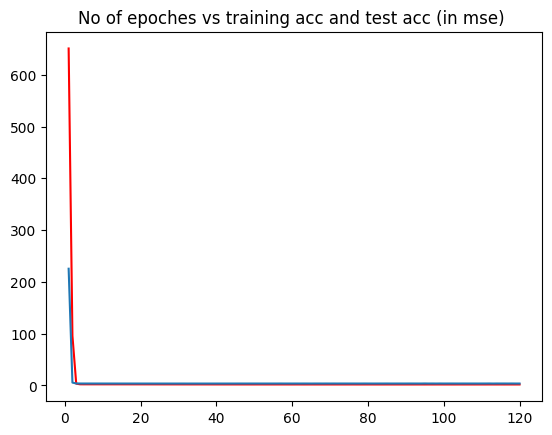

In [ ]:
import matplotlib.pyplot as plt
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']
acc=history_dict['mse']
val_acc=history_dict['val_mse']
epochs=range(1,len(acc)+1)
plt.plot(epochs, loss, color='r')

plt.plot(epochs, val_loss)
plt.title("No of epoches vs training loss and test loss")
plt.show()
plt.plot(epochs, acc,color='r')
plt.plot(epochs,val_acc)
plt.title("No of epoches vs training acc and test acc (in mse) ")
plt.show()

In [ ]:
model.summary()

# Get list of parameters
parameters = model.trainable_weights
print("List of Parameters:")
for param in parameters:
    print(param)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                128       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 4)                 68        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1785 (6.97 KB)
Trainable params: 1785 (6.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
List of Parameters:
<t

In [ ]:
testPredict=pd.DataFrame(testPredict,columns=['Keras_predict'])
print(len(testPredict))
testPredict.to_csv("keras_model.csv")
#print((testPredict))

1000


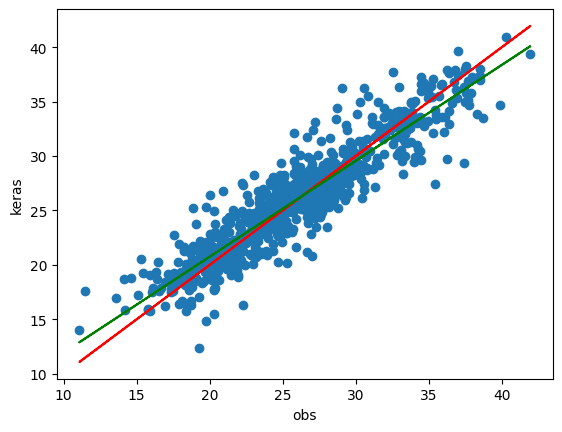

In [ ]:
from sklearn.linear_model import LinearRegression

df=pd.read_csv('/content/keras_model.csv')
df1=pd.read_csv("/content/final_output2.csv")
obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=df["Keras_predict"].tolist()





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model.fit(obs, np.array(exp_pred))
y_pred = model.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("keras")
plt.show()

[-1.8523539999999947, -0.5084150000000065, -0.44604899999999503, -0.2562230000000021, 0.16488200000001285, -0.7163140000000006, -0.7729630000000043, 2.101479000000001, 2.273086000000003, 0.05563699999999727, -1.8466470000000044, -0.6974339999999977, -1.8077260000000095, -0.027988000000000568, -0.058663999999993166, 0.607602, 2.2764710000000115, 1.1095839999999946, 0.5077750000000094, -1.1634400000000014, -0.7539460000000027, 1.6432360000000017, 0.6966319999999975, -0.6291510000000002, -0.8986920000000076, 0.04706999999999795, -0.20718800000000925, -1.0967540000000078, 0.5185199999999988, -0.42730700000000255, -0.33863999999999095, 0.17083599999999777, 1.6839629999999879, 3.104274000000011, 0.44153200000000226, -1.8592980000000026, -1.8085190000000004, -0.7369370000000117, -0.8111320000000006, 0.02827299999999866, 0.521048000000004, -0.5069159999999933, 2.508392999999998, -1.4961719999999978, -0.5893440000000005, -0.9103899999999996, -0.6058679999999974, -0.20120199999999855, 1.48236200

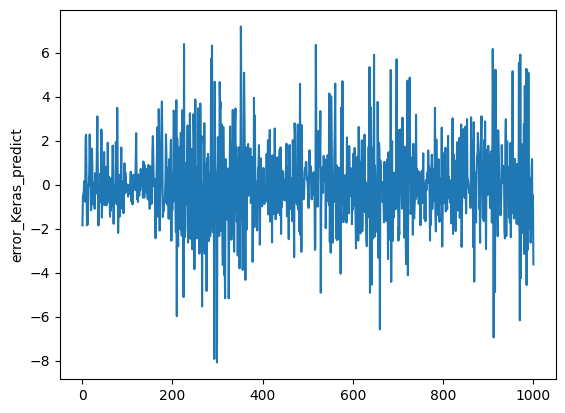

max_error 7.19024499999999
min_error -8.083189999999984
sd_error 1.892749099586027
error
median 0.028776499999999317
25_parcentile -0.9971199999999962
75_parcentile 1.0113632500000067
mae 1.3841153154245756
mse 3.58341618193264
var_obs 23.508105830899513
var_exp_pred 21.4997029554321
var_error 3.582499153983716
co_variance 20.73338820437832
co_variance_matrix [[23.53163747 20.7333882 ]
 [20.7333882  21.52122418]]


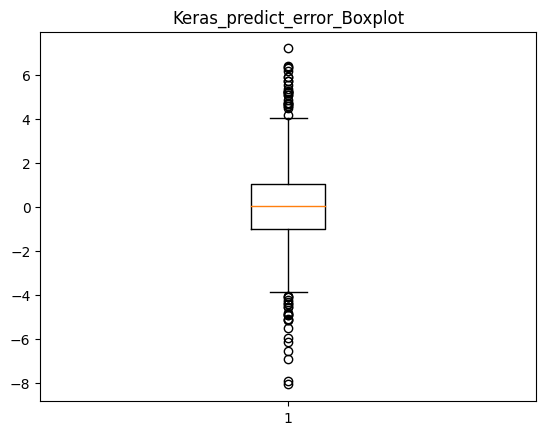

In [ ]:
obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=df["Keras_predict"].tolist()


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_Keras_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot

import matplotlib.pyplot as plt

plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('Keras_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)

269
[25.816774, 23.716532, 27.458393, 28.307018, 25.583704, 25.818907, 24.182215, 24.186544, 24.755941, 25.188778, 24.797958, 24.504677, 24.53508, 24.29446, 24.853918, 23.753706, 23.559305, 24.146332, 23.210796, 22.97617, 22.775864, 22.122932, 22.576017, 22.735264, 23.279915, 23.885649, 22.958977, 23.03883, 23.351652, 24.377756, 23.456745, 23.135555, 23.122921, 23.972116, 22.122932, 22.744986, 21.277636, 20.317326, 20.506964, 20.491652, 20.32302, 21.90115, 24.163319, 24.17761, 24.076181, 23.004328, 21.244236, 22.505564, 23.797783, 20.166069, 22.337034, 22.860115, 22.806288, 19.411062, 20.577244, 21.224382, 22.048412, 22.438774, 19.841282, 20.77881, 19.646961, 21.311045, 20.128786, 20.345179, 17.853428, 20.609978, 19.957108, 21.211538, 20.78213, 16.328218, 22.576895, 20.06257, 22.148052, 24.762646, 22.870817, 22.641844, 24.65638, 23.343803, 22.548496, 20.889112, 25.011482, 22.216702, 20.012774, 25.626026, 24.918217, 26.243387, 26.930845, 23.978834, 25.602478, 27.377884, 24.782263, 26.40

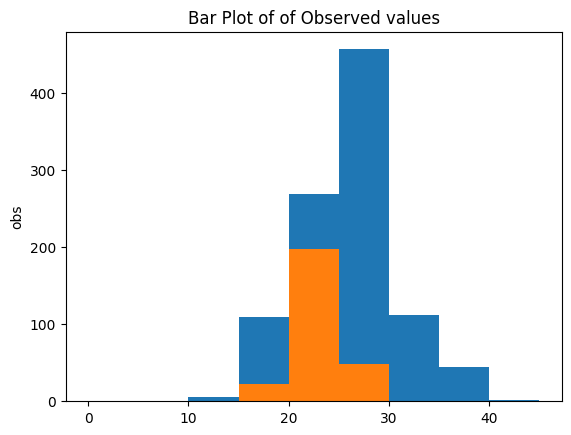

198
23
48
269
probability that the observed value is between 20 to 25 and predicted valued in the same range     P(f=20 to 25/ x=20 to 25) is: 0.7360594795539034
probability that the observed value is between 20 to 25 and predicted valued in the same           P(f=15 to 20/ x=20 to 25) is: 0.08550185873605948
probability that the observed value is between 20 to 25 and predicted valued in the same range of  P(f=25 to 30/ x=20 to 25) is: 0.17843866171003717


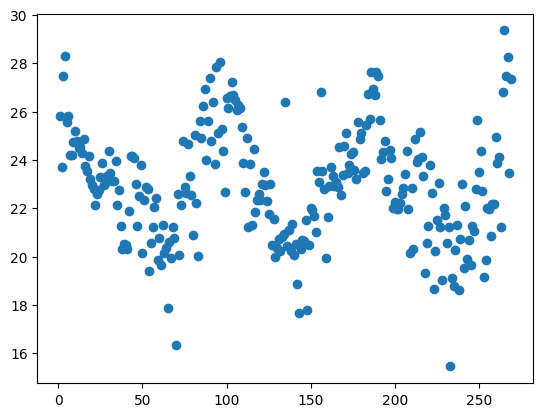

In [ ]:
bin_edges = [i * 5 for i in range(int((max(obs) // 5) + 2))]
plt.hist(obs, bins=bin_edges)
plt.ylabel('obs')
plt.title('Bar Plot of of Observed values')



#fix size for 20 to 25

list_x=[]
list_x1=[]
for i in range (len(obs)):
  if obs[i]<=25 and obs[i]>=20:
    list_x.append(obs.index(obs[i]))
    list_x1.append(obs[i])
print(len(list_x1))
list_f=[]
for i in range (len(list_x)):
  list_f.append(exp_pred[list_x[i]])
print(list_f)
print(len(list_f))


list2=[]
for i in range (len(list_f)):
  list2.append(i+1)

bin_edges = [i * 5 for i in range(int((max(obs) // 5) + 2))]
plt.hist(list_f, bins=bin_edges)
plt.show()
plt.scatter(list2,list_f)





list_x2=[]

for i in range (len(list_f)):
  if list_f[i]<=25 and list_f[i]>=20:
    list_x2.append(list_f[i])
print(len(list_x2))


list_x3=[]

for i in range (len(list_f)):
  if list_f[i]<=20 and list_f[i]>=15:
    list_x3.append(list_f[i])
print(len(list_x3))


list_x4=[]

for i in range (len(list_f)):
  if list_f[i]<=30 and list_f[i]>=25:
    list_x4.append(list_f[i])
print(len(list_x4))
print(len(list_f))


print("probability that the observed value is between 20 to 25 and predicted valued in the same range     P(f=20 to 25/ x=20 to 25) is:", len(list_x2)/len(list_f))
print("probability that the observed value is between 20 to 25 and predicted valued in the same           P(f=15 to 20/ x=20 to 25) is:", len(list_x3)/len(list_f))
print("probability that the observed value is between 20 to 25 and predicted valued in the same range of  P(f=25 to 30/ x=20 to 25) is:", len(list_x4)/len(list_f))

In [ ]:
#contingency table
mean_temp=26.589807712377375

k=[]
for i in range (len(obs)):
  if obs[i]>mean_temp and exp_pred[i]>mean_temp:
    k.append(i)
i_1=len(k)
#print(k)

j=[]
for i in range (len(obs)):
  if obs[i]<mean_temp and exp_pred[i]<mean_temp:
    j.append(i)
i_4=len(j)

l=[]
for i in range (len(obs)):
  if obs[i]<mean_temp and exp_pred[i]>mean_temp:
    l.append(i)
i_3=len(l)


m=[]
for i in range (len(obs)):
  if obs[i]>mean_temp and exp_pred[i]<mean_temp:
    m.append(i)
i_2=len(m)




from tabulate import tabulate

headers = ["Data/Forecst", "Above", "Below"]
data = [["Above", i_1,i_2 ],
        ["Below", i_3, i_4]]

table = tabulate(data, headers, tablefmt="fancy_grid")

print(table)


headers = ["Data/Forecast", "Above", "Below", ""]
data = [["Above", float(i_1/1000), float(i_2/1000),float((i_1/1000)+(i_2/1000)) ],
        ["Below", float(i_3/1000), float(i_4/1000), float((i_3/1000)+(i_4/1000))],
        ["", float((i_3/1000)+(i_1/1000)), float((i_2/1000)+(i_4/1000)), float(((i_3/1000)+(i_1/1000))+((i_2/1000)+(i_4/1000)))]]  # Added commas here

table1 = tabulate(data, headers, tablefmt="fancy_grid")
print(table1)

print(i_1+i_2+i_3+i_4)

╒════════════════╤═════════╤═════════╕
│ Data/Forecst   │   Above │   Below │
╞════════════════╪═════════╪═════════╡
│ Above          │     408 │      82 │
├────────────────┼─────────┼─────────┤
│ Below          │      74 │     436 │
╘════════════════╧═════════╧═════════╛
╒═════════════════╤═════════╤═════════╤══════╕
│ Data/Forecast   │   Above │   Below │      │
╞═════════════════╪═════════╪═════════╪══════╡
│ Above           │   0.408 │   0.082 │ 0.49 │
├─────────────────┼─────────┼─────────┼──────┤
│ Below           │   0.074 │   0.436 │ 0.51 │
├─────────────────┼─────────┼─────────┼──────┤
│                 │   0.482 │   0.518 │ 1    │
╘═════════════════╧═════════╧═════════╧══════╛
1000


In [ ]:
#Proportion of explained variable (parcent of P-variance) (best=1)

print("value of proportion of explained variable:",(((var_obs)-(var_error))/(var_obs)))


# corelation (skill score) (ideally 1)
#correlation--insensitive to symmetric error where mse works

print("value of correlation (skill score):",((cov)/(var_obs*var_exp_pred)**(1/2)) )

# corelation (skill score) (ideally 1)
#correlation--insensitive to symmetric error where mse works

#print("value of correlation (skill score):",((cov)/(var_obs*var_exp_pred)**(1/2)) )

p_aa=float(i_1/1000)
p_ba=float(i_2/1000)
p_ab=float(i_3/1000)
p_bb=float(i_4/1000)


p_c=p_aa+p_bb
p_e=((float((i_3/1000)+(i_1/1000)))*(float((i_2/1000)+(i_4/1000))))+((float((i_2/1000)+(i_1/1000)))*(float((i_3/1000)+(i_4/1000))))

# hedic skill score

S=((p_c)-(p_e))/(1-(p_e))
print("Hedic skill score:",S)

value of proportion of explained variable: 0.8476057926677015
value of correlation (skill score): 0.9222427098835458
Hedic skill score: 0.6882643518296484
